This model was created to observe how the given dataset performs using decision tree and whether it is appropriate to use this dataset in this model. The most optimum model for this dataset can be found by trying different parameters.

In [19]:
#python version 3.12.3

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [20]:
#data load and check its structure
data_path   = "/content/data_banknote_authentication.txt"

data        = pd.read_csv (data_path, header=None, delimiter = ",")

data.columns= ['variance','skewness','kurtosis','entropy','class'] #features

print(data.head())
print(data.describe())
print(data['class'].value_counts())

   variance  skewness  kurtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
          variance     skewness     kurtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
class
0    762
1    610
Name: count, dtype: int64


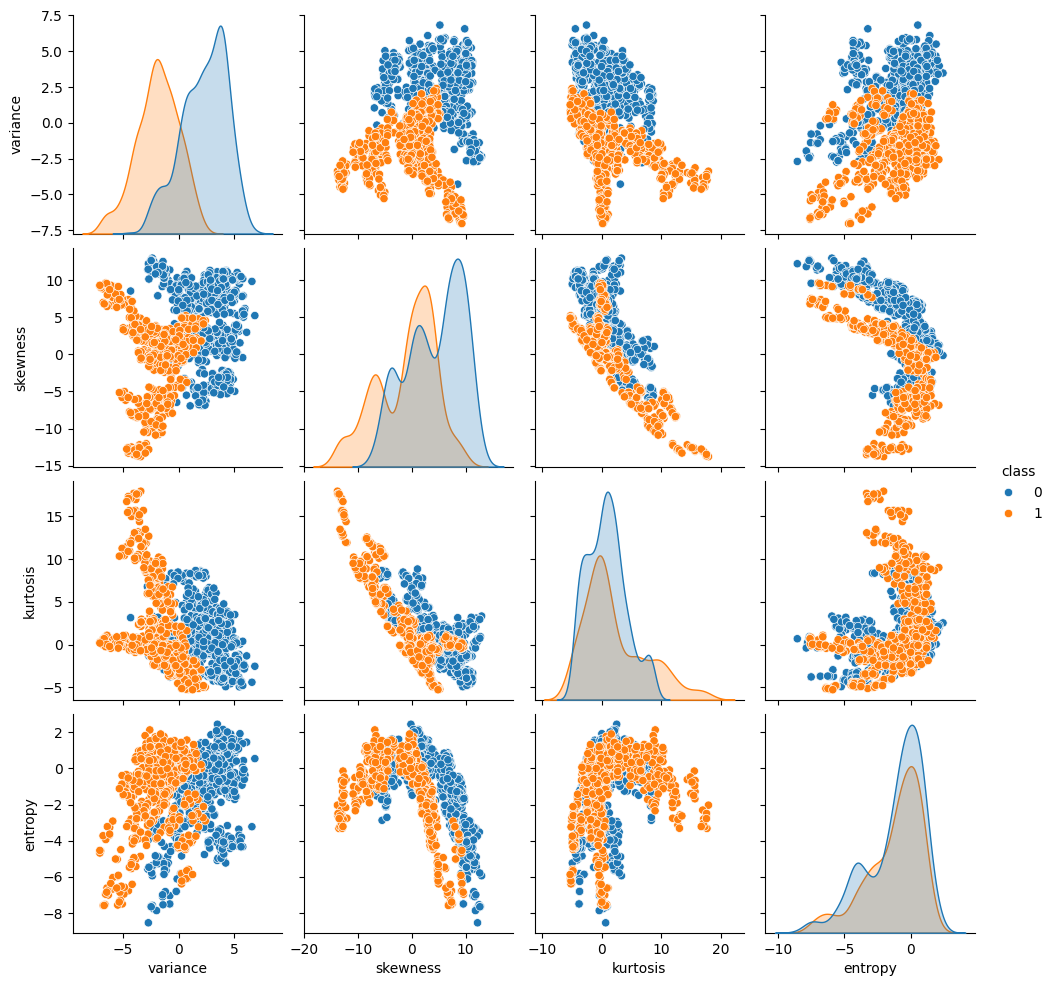

In [21]:
sns.pairplot(data, hue='class', vars=['variance','skewness','kurtosis','entropy'])
plt.show    ()

This graph shows the distribution of parameters according to classes (KDE — Kernel Density Estimate — graphs show the class distribution for a single feature). We can also see the distribution of different parameters among each other according to classes, for example row 1, column 2 (top row, second column) is a scatter of skewness (x-axis) vs. variance (y-axis). This helps us compare how the two classes differ for each pair (scatter) or each individual feature (diagonal).

In [22]:
X = data.drop('class', axis=1)  #use only the selected features for X
y = data     ['class']          #drop class label

# training / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 2025, stratify=y
)

# decision Tree with some case parameters ---->   #2 5 10     #10 50 200
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, random_state = 2025)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# precision , recall, f1-score , support printed on the console as well
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       153
           1       0.97      0.95      0.96       122

    accuracy                           0.96       275
   macro avg       0.96      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275



In this section, model performance can be compared with different combinations by changing the parameters seed, criterion, max_depth, and min_sample_split.

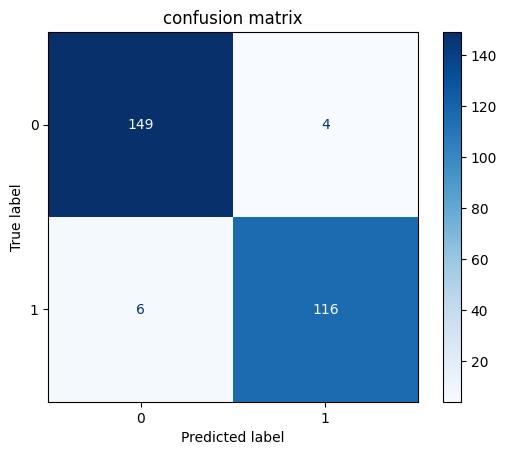

In [23]:
# confusion matrix
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, cmap='Blues')
plt.title('confusion matrix')
plt.show ()

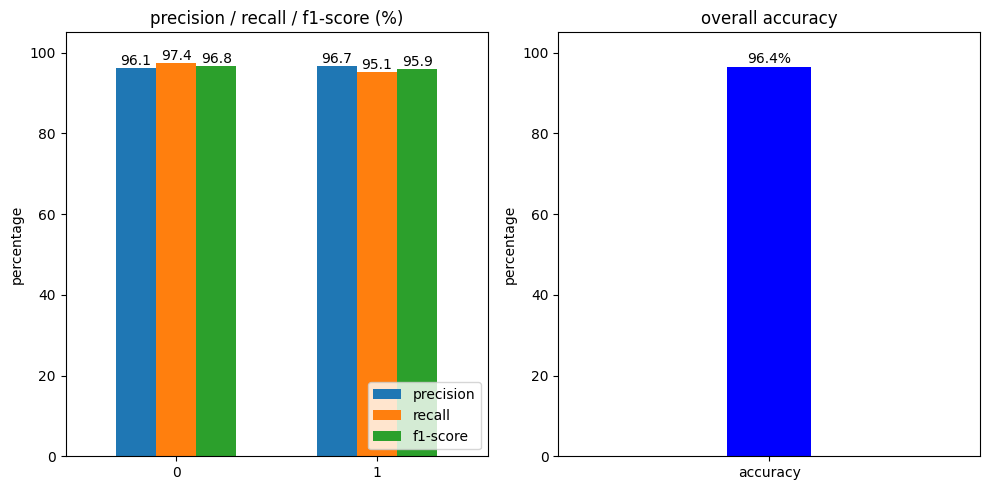

accuracy: 96.4%


In [24]:
report         = classification_report(y_test, y_pred, output_dict=True)

# convert the report into a dataframe (pandas)
df_report      = pd.DataFrame(report).transpose()

#f1, recall, precision, accuracy scores
report         = classification_report(y_test, y_pred, output_dict=True)
df_report      = pd.DataFrame(report).transpose()

# showing as a chart table
df_metrics     = (  df_report[['precision','recall','f1-score']]
                    .drop('support', axis=1, errors='ignore')*100)

# plot accuracy seperately from others
df_metrics     = df_metrics.drop('accuracy', errors='ignore')

row_order      = ['0','1',]  # excluded 'macro avg','weighted avg']
df_metrics     = df_metrics.loc[row_order]

accuracy_value = report['accuracy'] * 100

fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(10,5))

# chart bar for precision , recall, f1-score
df_metrics.plot (kind='bar', width=0.6, rot=0, ax=ax1)
ax1.set_ylim    ([0, 105])
ax1.set_title   ("precision / recall / f1-score (%)")
ax1.set_ylabel  ("percentage")
ax1.legend      (loc='lower right')

# show percentages of scores
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f')

# accuracy chart
bar_width= 0.2
bars     = ax2.bar([0], [accuracy_value], color='blue', width=bar_width)

ax2.set_xticks     ([0])
ax2.set_xticklabels(["accuracy"])

ax2.set_xlim       ([-0.5, 0.5])

ax2.set_ylim       ([0, 105])
ax2.set_ylabel     ("percentage")
ax2.set_title      ("overall accuracy")

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2,
            height + 1,
            f"{height:.1f}%",
            ha='center')

plt.tight_layout()
plt.show        ()

# accuracy showing on the console as well
accuracy = report['accuracy'] * 100
print(f"accuracy: {accuracy:.1f}%")

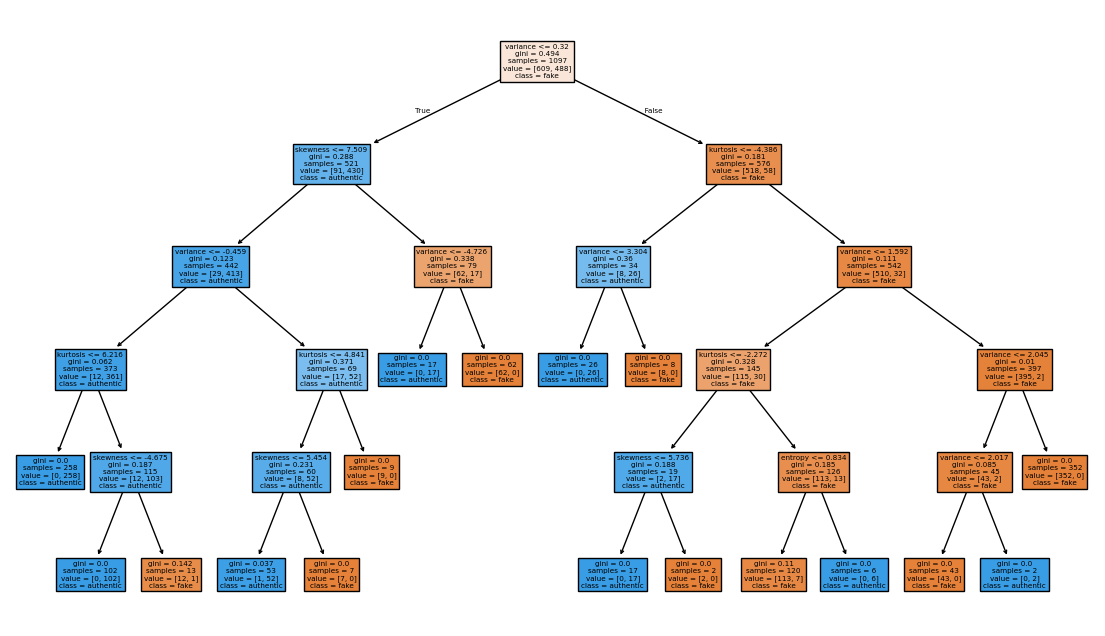

In [25]:
# plot tree
plt.figure(figsize=(14, 8))
plot_tree (dt, feature_names=X.columns, class_names=['fake','authentic'], filled=True)
plt.show  ()

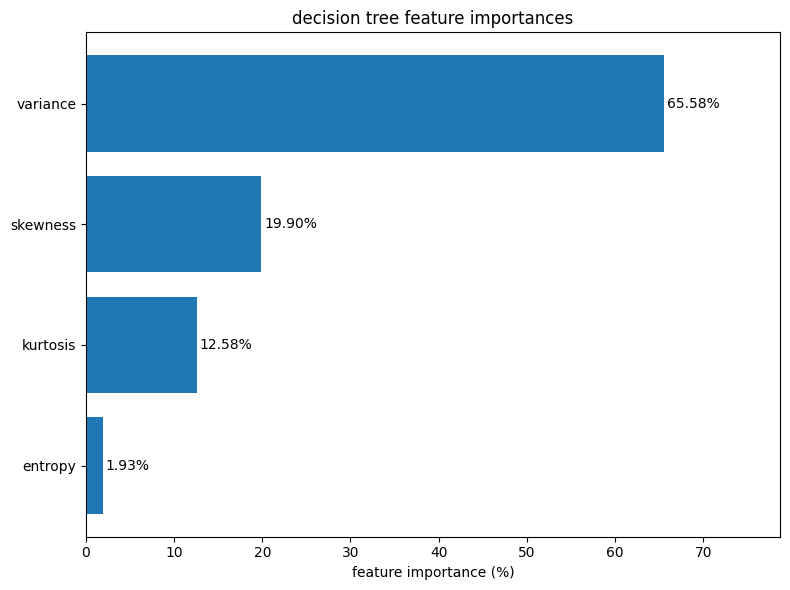

In [26]:
# plot feature importance
importances= dt.feature_importances_
features   = X.columns

# sorting ------> descending order
sorted_idx = np.argsort(importances)

plt.figure (figsize=(8, 6))

importance_perc = importances[sorted_idx] * 100

bars = plt.barh(range(len(features)), importance_perc, align='center')
plt.yticks(range(len(features)), [features[i] for i in sorted_idx])
plt.xlabel('feature importance (%)')
plt.title ('decision tree feature importances')

# show each bars percentage
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.3,         # x - position
            bar.get_y() + bar.get_height()/2,  # y - position
            f"{width:.2f}%",
            va='center')

plt.xlim        ([0, max(importance_perc) * 1.2])  # for labels
plt.tight_layout()
plt.show        ()

As seen in the decision tree, variance is the feature that the model most often uses and is frequently used in the root and early nodes, as it provides the most information gain from here. Later, skewness continues as an important discriminator in the nodes that come after variance. Kurtosis and entropy decision makers are used the least.

** ⭐  Have fun ⭐ 🙂 **